# ensemble

학습된 하나의 모델을 사용하는 것보다 학습된 여러개의 모델을 사용하면 보다 정확한 예측을 기대할 수 있다.

voting은 여러 예측 모델을 두고 각 모델이 voting하여 최종 결정을 하며,\
bagging은 하나의 모델을 여러개의 데이터 샘플링하여 학습하고 voting하여 최종 결정한다.\
각각 데이터 샘플링하는 방법은 부트스트래핑 분할방식이라고 한다.\
하드보팅은 최종 결정에서 여러개의 모델이 선택한 결정을 따르며, 소프트 보팅은 각 모델이 게인값을 갖고 최종 결정을 한다.

random forest는 bagging의 대표적인 방법이며,\
부트스트래핑으로 샘플링한 데이터마다 예측한 결과를 소프트 보팅하여 최종 예측 결정을 한다.\
Random forest는 앙상블 방법 중 속도가 빠르고 높은 성능을 보여준다.\
Human Activity Recognition Data를 Random forest 기법을 활용하여 분석해본다.


In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [2]:
url =  'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'
feature_name_df = pd.read_csv(url, sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist()

In [3]:
x_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
x_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

x_train = pd.read_csv(x_train_url, sep='\s+', header=None)
x_test = pd.read_csv(x_test_url, sep='\s+', header=None)
y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

x_train.columns = feature_name
x_test.columns = feature_name

In [4]:
# 결정나무의 정확도

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=5)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
accuracy_score(y_test, pred)

0.839497794367153

In [5]:
# GridSearch

params = {'max_depth':list(range(6,18,2))}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=5),
             param_grid={'max_depth': [6, 8, 10, 12, 14, 16]},
             return_train_score=True, scoring='accuracy')

In [6]:
# max_depth에 따른 스코어

cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843989,0.944879
1,8,0.848078,0.982692
2,10,0.847399,0.993403
3,12,0.843727,0.997212
4,14,0.849304,0.998776
5,16,0.844543,0.999660


In [7]:
# max_depth가 8에서 가장 점수가 높다는 것을 알았다.
# 최상의 depth인지 과적합의 결과물인지 확인한다.

max_depth = list(range(6,17))

for depth in max_depth :
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=5)
    dt_clf.fit(x_train, y_train)
    pred = dt_clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    print('Max_Depth = ', depth, ', Accuracy = ', accuracy)

Max_Depth =  6 , Accuracy =  0.8551068883610451
Max_Depth =  7 , Accuracy =  0.8618934509670851
Max_Depth =  8 , Accuracy =  0.8720732948761453
Max_Depth =  9 , Accuracy =  0.8717339667458432
Max_Depth =  10 , Accuracy =  0.8703766542246352
Max_Depth =  11 , Accuracy =  0.8686800135731252
Max_Depth =  12 , Accuracy =  0.8656260604004072
Max_Depth =  13 , Accuracy =  0.8642687478791992
Max_Depth =  14 , Accuracy =  0.8571428571428571
Max_Depth =  15 , Accuracy =  0.8578215134034611
Max_Depth =  16 , Accuracy =  0.8540889039701391


In [8]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(x_test)
accuracy_score(y_test, pred1)

0.8571428571428571

In [ ]:
# random forest로 확인한다.

params = {
    'max_depth' : [6, 8, 10],
    'n_estimators' : [50, 100, 200],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

rf_clf = RandomForestClassifier(random_state=5, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

In [42]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [32]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
29,1,0.917301,200,10
26,1,0.917301,200,10
28,3,0.917165,100,10
25,3,0.917165,100,10
27,5,0.916077,50,10


In [33]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 200}

In [34]:
grid_cv.best_score_

0.9173014145810664

In [35]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(x_train, y_train)
pred1 = rf_clf_best.predict(x_test)
accuracy

/home/han/venv/myvenv/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8540889039701391

In [37]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=x_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

tGravityAcc-max()-X                0.039687
angle(X,gravityMean)               0.037061
tGravityAcc-min()-X                0.033086
tGravityAcc-max()-Y                0.028632
tGravityAcc-energy()-X             0.028522
tGravityAcc-mean()-X               0.026433
tGravityAcc-min()-Y                0.025770
angle(Y,gravityMean)               0.021096
tGravityAcc-mean()-Y               0.020736
tGravityAcc-energy()-Y             0.014815
tBodyAccJerk-mad()-X               0.014375
tGravityAcc-max()-Z                0.013856
tBodyAccJerk-std()-X               0.012815
tBodyAcc-max()-X                   0.010964
fBodyAccJerk-bandsEnergy()-1,16    0.010780
tGravityAcc-min()-Z                0.010769
fBodyAccJerk-energy()-X            0.010540
fBodyAccMag-std()                  0.010408
fBodyAccMag-energy()               0.010063
fBodyAcc-mad()-X                   0.009798
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

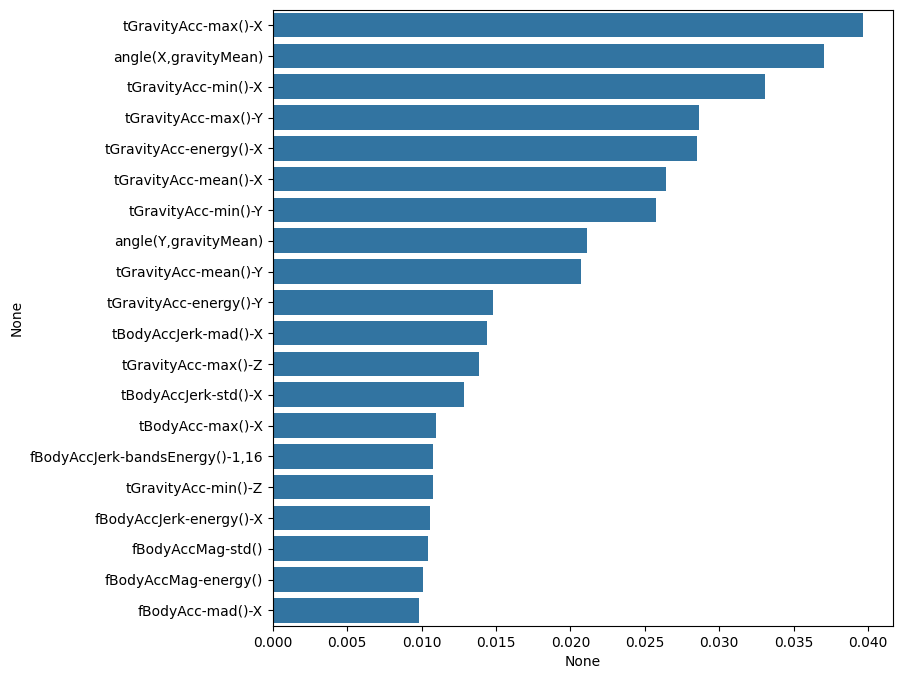

In [38]:
plt.figure(figsize=(8,8))
sns.barplot(x=top20_cols, y=top20_cols.index)
plt.show

In [40]:
x_train_re = x_train[top20_cols.index]
x_test_re = x_test[top20_cols.index]
rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(x_train_re, y_train.values.reshape(-1,))
pred1_re = rf_clf_best_re.predict(x_test_re)
accuracy_score(y_test, pred1_re)

0.8059043094672549